In [1]:
# Made by Naman Singh
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#load the dataset
data_address="/Users/naman/Downloads/creditcard.xlsx"

# --- 1) Load the Excel file, treating the first row as column names (ignored as data) ---
dataset_file = pd.read_excel(data_address, header=0)  # header row = column names
#drop rows with missing values:
dataset_file = dataset_file.dropna()
#convert to numpy array
values = dataset_file.to_numpy()


In [3]:
# Split into features and target as NumPy arrays ---
# x: all columns except the last (2D)
# y: the last column only (1D)
x = values[:, :-1] #take all rows and all columns except column at index -1
y = values[:, -1] #take all rows and column at index -1
#free some space in ram
del values
del dataset_file

In [4]:
#split between training and testing (80-20)
size=len(y)
split=int(0.8*size)
#first split elements are for training
x_train=x[:split] #take rows from 0 to split-1 and all columns
y_train=y[:split]
x_test=x[split:] #take rows from split to end and all columns
y_test=y[split:]
print("Details of the dataset are as follows:\n")
print("Training:\n")
print(f"number of samples with y=1 (fraud): {len(y_train[y_train==1])}")
print(f"number of samples with y=0 (not fraud): {len(y_train[y_train==0])}")
print()
print("Testing:\n")
print(f"number of samples with y=1 (fraud): {len(y_test[y_test==1])}")
print(f"number of samples with y=0 (not fraud): {len(y_test[y_test==0])}")

#free some space in ram
del x
del y


Details of the dataset are as follows:

Training:

number of samples with y=1 (fraud): 394
number of samples with y=0 (not fraud): 227451

Testing:

number of samples with y=1 (fraud): 98
number of samples with y=0 (not fraud): 56864


In [5]:
# more efficient approach, vectorized approach
def compute_gradient(x,y,w,b):
    m,n=x.shape  # m is number of examples, n is number of features
    z=np.dot(x,w)+b # (m,n) dot (n,)= (m,) 1D array
    f_wb=1/(1+np.exp(-z))
    error=f_wb-y #1 D array of size m
    dj_dw=np.dot(x.T,error)/m  #x.T is a n*m matrix (T-> transpose)  (n,m) dot (m,) = (n,)
    dj_db=np.sum(error)/m
    return dj_dw, dj_db



In [6]:
# more efficient approach, vectorized approach
def compute_gradient_reg(x,y,w,b,lambda_):
    m= x.shape[0]  # m is number of examples
    dj_dw, dj_db = compute_gradient(x,y,w,b)
    dj_dw+= (lambda_*w)/m  # regularization term
    return dj_dw, dj_db




In [7]:
def cost_fn(x,y,w,b):
    m,n=x.shape
    sum=0
    z=np.dot(x,w)+b
    f_wb=1/(1+np.exp(-z)) # (m,) 1D array
    cost=np.sum(-y*np.log(f_wb) - (1-y)*np.log(1-f_wb))/m
    return cost

In [8]:
def cost_fn_reg(x,y,w,b,lambda_):
    m=x.shape[0]
    old_cost=cost_fn(x,y,w,b)
    #this is the cost function without regularization
    reg_cost=np.sum(w**2)  #summing the squares of all elements in w
    #much faster than using a for loop
    reg_cost*=lambda_/(2*m)  #dividing by 2m
    cost=old_cost+reg_cost
    
    return cost

In [9]:
def change_parameters(x,y,w,b,a,lamda_):
    dj_dw,dj_db=compute_gradient_reg(x,y,w,b,lamda_)
    w=w-a*dj_dw
    b=b-a*dj_db
    return w,b

In [10]:
def gradient_descent_reg(x,y,w,b,a,iterations,lambda_=1):
    j=[]
    cost=cost_fn_reg(x,y,w,b,lambda_)
    j.append(cost)
    old=cost
    flag=0 # flag to check if cost function is increasing
    same=0 # flag to check if cost function is same for 10 iterations
    for i in range(iterations):
        w,b=change_parameters(x,y,w,b,a,lambda_)
        cost=cost_fn_reg(x,y,w,b,lambda_)
        j.append(cost)
        print(f"cost function at {i+1} epochs is {cost}")
        if(old<cost):
            flag=i+1
            break
        #set up an automatic convergence criteria
        if((old-cost)<1e-5):
            same+=1
            if(same==10):
                print(f"cost function has not changed for 10 iterations, stopping gradient descent at epoch {i+1}")
                break
            else:
                same=0
        old=cost

    if flag!=0:
        print(f"Cost function has increased at epoch {flag}, stopping gradient descent\n please try a smaller learning rate")
    else:
        print("cost function is always decreasing as expected")
    return w,b,j
        

In [11]:
m=y_train.shape[0]
n=x_train.shape[1]
print(f"number of training examples are {m}, number of features are {n}")

number of training examples are 227845, number of features are 30


In [12]:
#normalizing the features
mu=np.mean(x_train,axis=0)
sigma=np.std(x_train,axis=0)
x_train=(x_train-mu)/sigma

# taking initial values as 0 
w=np.zeros(n)
b=0
a=1 #learning rate alpha
lambda_=1 #regularization parameter
epochs=500
w,b,j_history=gradient_descent_reg(x_train,y_train,w,b,a,epochs,lambda_)


cost function at 1 epochs is 0.4749086161219001
cost function at 2 epochs is 0.34900410194886167
cost function at 3 epochs is 0.27162260306721514
cost function at 4 epochs is 0.22068285508932534
cost function at 5 epochs is 0.1851308747308414
cost function at 6 epochs is 0.15912584005418326
cost function at 7 epochs is 0.1393784592280378
cost function at 8 epochs is 0.12392429782774754
cost function at 9 epochs is 0.11152906977987104
cost function at 10 epochs is 0.10138307832690743
cost function at 11 epochs is 0.09293535462842399
cost function at 12 epochs is 0.08579908953531597
cost function at 13 epochs is 0.07969533364396733
cost function at 14 epochs is 0.07441818822017492
cost function at 15 epochs is 0.06981255811454055
cost function at 16 epochs is 0.06575951230038465
cost function at 17 epochs is 0.06216639865146375
cost function at 18 epochs is 0.058960014012894926
cost function at 19 epochs is 0.056081787415119405
cost function at 20 epochs is 0.053484319842970036
cost func

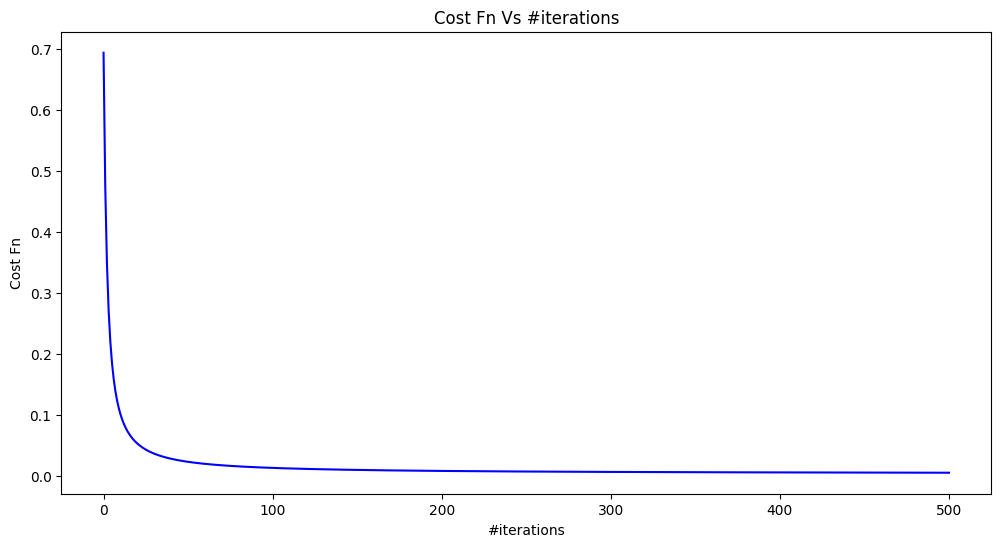

In [13]:

# Plot our model prediction
plt.figure(figsize=(12,6))
plt.plot(j_history,c='b')

# Set the title
plt.title("Cost Fn Vs #iterations")
# Set the y-axis label
plt.ylabel('Cost Fn')
# Set the x-axis label
plt.xlabel('#iterations')
plt.show()

In [14]:
# for predicting a new example:
# first convert x to 2D array if it is 1D
#then normalize it using old mu and sigma

x_test=(x_test-mu)/sigma
z=np.dot(x_test,w)+b
f_wb=1/(1+np.exp(-z))
y_pred=np.array([1 if i>=0.5 else 0 for i in f_wb])
#find accuracy
accuracy=len(y_pred[y_pred==y_test])/len(y_test)
print(f"accuracy on test set is {accuracy*100:.2f}%")
#for the final output, find f_wb and if f_wb>=0.5 then y=1 else y=0

accuracy on test set is 99.94%


In [15]:
#saving all the weights and bias in a text file
from contextlib import redirect_stdout

with open("Result.txt", "w", encoding="utf-8") as f, redirect_stdout(f):
    # Everything printed here goes into Result.txt (old contents are replaced)
    print("Model coded by Naman Singh\n\n")
    print("\nTechnique used: Logistic Regression + Normalization + Regularization\n")
    print("The results are as follows:\n")
    print()
    print("w=[")
    for weight in w:
        print(f"{weight},")
    print("]")
    print()
    print(f"b={b}")
    print()
    print(f"The threshold used for Logistic Regression is:{0.5}")
    print()
    print(f"The mean used for Normalization is:\n{mu}")
    print()
    print(f"The standard deviation used for Normalization is:\n{sigma}")
    print()
    print(f"Accuracy on the test set is {accuracy*100:.2f}%")
    
print("Done")


Done
